In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [0]:
pd.set_option('display.expand_frame_repr', False)

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# !ls "/content/drive/My Drive"
train_df = pd.read_csv('/content/drive/My Drive/Google_Colab_Trials/train.csv')
test_df  = pd.read_csv('/content/drive/My Drive/Google_Colab_Trials/test.csv')

In [5]:
print ("Number of rows in training dataset = {}".format(train_df.shape[0]))
print ("Number of columns in training dataset = {}".format(train_df.shape[1]))

Number of rows in training dataset = 17775
Number of columns in training dataset = 57


In [6]:
print ("Number of rows in testing dataset = {}".format(test_df.shape[0]))
print ("Number of columns in testing dataset = {}".format(test_df.shape[1]))

Number of rows in testing dataset = 7618
Number of columns in testing dataset = 57


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17775 entries, 0 to 17774
Data columns (total 57 columns):
Unnamed: 0                        17775 non-null int64
serial_number                     17775 non-null int64
fund_symbol                       17775 non-null object
fund_name                         17775 non-null object
category                          17775 non-null object
fund_family                       17775 non-null object
investment                        16650 non-null object
size                              16650 non-null object
total_net_assets                  17775 non-null float64
currency                          17775 non-null object
net_annual_expenses               17763 non-null float64
morningstar_rating                17775 non-null int64
inception_date                    17775 non-null object
portfolio_cash                    17770 non-null float64
portfolio_stocks                  17770 non-null float64
portfolio_bonds                   17770 non-null f

In [0]:
train_df = train_df[~train_df['bonds_aaa'].isnull()].reset_index()

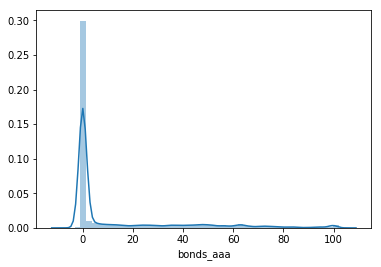

In [9]:
sns.distplot(train_df['bonds_aaa'])

In [10]:
train_df['bonds_aaa'].describe()

count    17770.000000
mean        13.168192
std         24.591146
min         -7.600000
25%          0.000000
50%          0.000000
75%         14.250000
max        104.170000
Name: bonds_aaa, dtype: float64

In [11]:
#skewness and kurtosis
print("Skewness: %f" % train_df['bonds_aaa'].skew())
print("Kurtosis: %f" % train_df['bonds_aaa'].kurt())

Skewness: 1.894421
Kurtosis: 2.605314


In [12]:
train_df.head()

,index,Unnamed: 0,serial_number,fund_symbol,fund_name,category,fund_family,investment,size,total_net_assets,...,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y
0,0,0,1,QBDAX,Quantified Managed Income Advisor,Intermediate-Term Bond,Advisors Preferred,Blend,Large,4.077000e+07,...,NaN,NaN,NaN,4,-0.02,0.74,0.10,3.03,0.17,0.64
1,1,1,2,TSMLX,TIAA-CREF Lifestyle Moderate Retail,Allocation--50% to 70% Equity,TIAA Investments,Growth,Large,3.319900e+08,...,NaN,NaN,NaN,3,-0.14,1.07,0.52,6.86,0.81,5.09
2,2,2,3,DHQAX,Day Hagan Logix Tactical Dividend A,Large Value,Day Hagan,Value,Large,1.199400e+08,...,NaN,NaN,NaN,1,-2.18,0.69,0.47,8.93,0.56,6.76
3,3,3,4,NMGCX,Neuberger Berman Mid Cap Growth C,Mid-Cap Growth,Neuberger Berman,Growth,Medium,1.370000e+09,...,11.27,0.54,26.88,3,-3.03,1.02,0.68,11.86,0.63,6.87
4,4,4,5,MERIX,Merger Institutional,Market Neutral,Westchester Capital,Growth,Large,2.370000e+09,...,NaN,NaN,NaN,2,1.85,-0.16,0.20,2.98,0.59,-10.58


In [13]:
train_df.columns

Index(['index', 'Unnamed: 0', 'serial_number', 'fund_symbol', 'fund_name',
       'category', 'fund_family', 'investment', 'size', 'total_net_assets',
       'currency', 'net_annual_expenses', 'morningstar_rating',
       'inception_date', 'portfolio_cash', 'portfolio_stocks',
       'portfolio_bonds', 'portfolio_others', 'portfolio_preferred',
       'portfolio_convertable', 'sectors_basic_materials',
       'sectors_consumer_cyclical', 'sectors_financial_services',
       'sectors_real_estate', 'sectors_consumer_defensive',
       'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning',
       'bonds_us_government', 'bonds_aaa', 'bonds_aa', 'bonds_a', 'bonds_bbb',
       'bonds_bb', 'bonds_b', 'bonds_below_b', 'bonds_others',
       'morningstar_return_rating', 'returns_ytd', 'returns_2017',
       'returns_2016', 'returns_2015', 'returns_2014', 'returns_2013',
       're

In [0]:
columns = ['index', 'Unnamed: 0', 'serial_number', 'currency', 'inception_date',
          'bonds_us_government']
train_df.drop(columns, inplace=True, axis=1)

In [15]:
train_df.tail()

,fund_symbol,fund_name,category,fund_family,investment,size,total_net_assets,net_annual_expenses,morningstar_rating,portfolio_cash,...,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y
17765,NGCRX,American Funds Retire Inc Port-Cnsrv C,Allocation--30% to 50% Equity,American Funds,Blend,Large,5.236300e+08,1.09,0,7.12,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
17766,PKRRX,Invesco Peak Retirement 2055 R6,Target-Date 2055,Invesco,Blend,Large,5.091800e+05,0.00,0,3.16,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
17767,OIDNX,Oppenheimer International Diversified R,Foreign Large Growth,OppenheimerFunds,Growth,Large,4.650000e+09,0.87,5,4.44,...,20.47,-15.45,17.31,3,3.29,0.87,0.67,11.25,0.66,8.06
17768,TRAIX,T. Rowe Price Capital Appreciation I,Allocation--50% to 70% Equity,T. Rowe Price,Growth,Large,2.957000e+10,0.60,5,4.56,...,NaN,NaN,NaN,4,2.48,0.99,0.70,6.61,1.17,7.89
17769,PRGIX,T. Rowe Price Growth & Income,Large Blend,T. Rowe Price,Blend,Large,1.880000e+09,0.66,3,2.93,...,14.85,-0.14,13.92,2,0.34,0.89,0.85,9.62,0.99,10.66


In [16]:
train_df_copy = train_df.copy().dropna(how='all')
train_df.shape

(17770, 52)

In [17]:
#missing data observing in columns
total = train_df.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((train_df.isnull().sum(axis=0)/train_df.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
returns_2010,8918,50.185706
returns_2011,8143,45.824423
returns_2012,7393,41.603827
returns_2013,6397,35.998875
returns_2014,5396,30.365785
returns_2015,4302,24.209342
returns_2016,3038,17.096230
returns_2017,1921,10.810355
treynor_ratio_3y,1846,10.388295
alpha_3y,1846,10.388295


In [0]:
columns = ['returns_2010', 'returns_2011', 'returns_2012', 'returns_2013', 
           'returns_2014']
train_df.drop(columns, inplace=True, axis=1)

In [19]:
train_df.head()

,fund_symbol,fund_name,category,fund_family,investment,size,total_net_assets,net_annual_expenses,morningstar_rating,portfolio_cash,...,returns_2017,returns_2016,returns_2015,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y
0,QBDAX,Quantified Managed Income Advisor,Intermediate-Term Bond,Advisors Preferred,Blend,Large,4.077000e+07,2.01,3,14.60,...,4.36,NaN,NaN,4,-0.02,0.74,0.10,3.03,0.17,0.64
1,TSMLX,TIAA-CREF Lifestyle Moderate Retail,Allocation--50% to 70% Equity,TIAA Investments,Growth,Large,3.319900e+08,0.37,4,1.54,...,16.71,6.31,0.26,3,-0.14,1.07,0.52,6.86,0.81,5.09
2,DHQAX,Day Hagan Logix Tactical Dividend A,Large Value,Day Hagan,Value,Large,1.199400e+08,1.60,2,13.12,...,10.13,10.45,-2.39,1,-2.18,0.69,0.47,8.93,0.56,6.76
3,NMGCX,Neuberger Berman Mid Cap Growth C,Mid-Cap Growth,Neuberger Berman,Growth,Medium,1.370000e+09,1.86,3,4.27,...,24.10,3.83,0.40,3,-3.03,1.02,0.68,11.86,0.63,6.87
4,MERIX,Merger Institutional,Market Neutral,Westchester Capital,Growth,Large,2.370000e+09,1.11,4,43.31,...,2.74,2.94,-0.52,2,1.85,-0.16,0.20,2.98,0.59,-10.58


In [20]:
numerical_feature_columns = list(train_df._get_numeric_data().columns)
print ("Number of numeric columns = {}".format(len(numerical_feature_columns)))

Number of numeric columns = 41


In [21]:
categorical_feature_columns = list(set(train_df.columns) - set(train_df._get_numeric_data().columns))
print ("Number of categorical columns = {}".format(len(categorical_feature_columns)))

Number of categorical columns = 6


In [0]:
from sklearn.base import TransformerMixin


class SeriesImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        If the Series is of dtype Object, then impute with the most frequent object.
        If the Series is not of dtype Object, then impute with the mean.  

        """
    def fit(self, X, y=None):
        if   X.dtype == np.dtype('O'): self.fill = X.value_counts().index[0]
        else                            : self.fill = X.median()
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [23]:
categorical_feature_columns

['size', 'category', 'investment', 'fund_symbol', 'fund_name', 'fund_family']

In [24]:
#missing data observing in columns
total = train_df[categorical_feature_columns].isnull().sum(axis=0).sort_values(ascending=False)
percent = ((train_df[categorical_feature_columns].isnull().sum(axis=0)/train_df[categorical_feature_columns].isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(10)

,Total,Percent
investment,1124,6.325267
size,1124,6.325267
fund_family,0,0.000000
fund_name,0,0.000000
fund_symbol,0,0.000000
category,0,0.000000


In [25]:
#missing data observing in columns
total = train_df[numerical_feature_columns].isnull().sum(axis=0).sort_values(ascending=False)
percent = ((train_df[numerical_feature_columns].isnull().sum(axis=0)/train_df[numerical_feature_columns].isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(10)

,Total,Percent
returns_2015,4302,24.209342
returns_2016,3038,17.096230
returns_2017,1921,10.810355
alpha_3y,1846,10.388295
sharpe_ratio_3y,1846,10.388295
treynor_ratio_3y,1846,10.388295
beta_3y,1846,10.388295
mean_annual_return_3y,1846,10.388295
standard_deviation_3y,1846,10.388295
returns_ytd,100,0.562746


In [0]:
missing_value_imputer  = SeriesImputer()   # Initialize the imputer

for cols in train_df.columns:
  missing_value_imputer.fit(train_df[cols])      # Fit the imputer
  train_df[cols] = missing_value_imputer.transform(train_df[cols])   # Get a new series

In [27]:
train_df.isnull().values.any()

False

In [28]:
train_df.shape

(17770, 47)

In [29]:
categorical_feature_columns

['size', 'category', 'investment', 'fund_symbol', 'fund_name', 'fund_family']

In [30]:
train_df['size'].value_counts()

Large     11403
Medium     4108
Small      2259
Name: size, dtype: int64

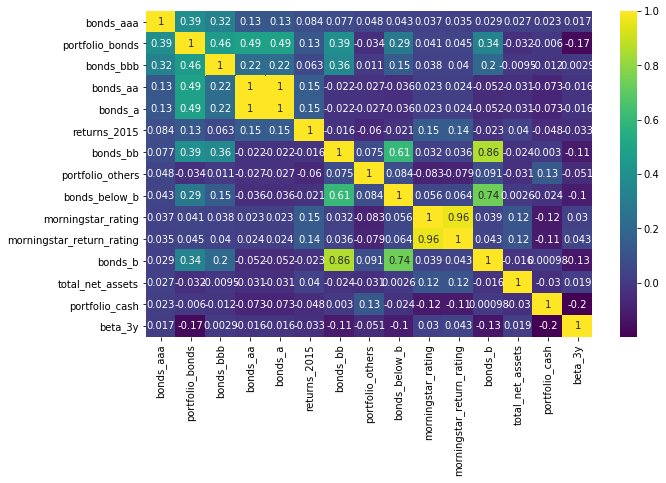

In [31]:
k = 15 #number of variables for heatmap
cols = train_df.corr().nlargest(k, 'bonds_aaa')['bonds_aaa'].index
cm = train_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

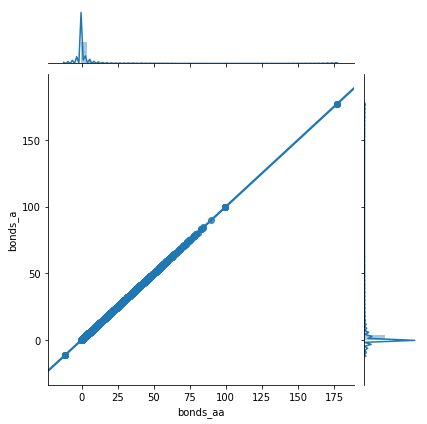

In [32]:
sns.jointplot('bonds_aa', 'bonds_a', data=train_df, kind='reg')

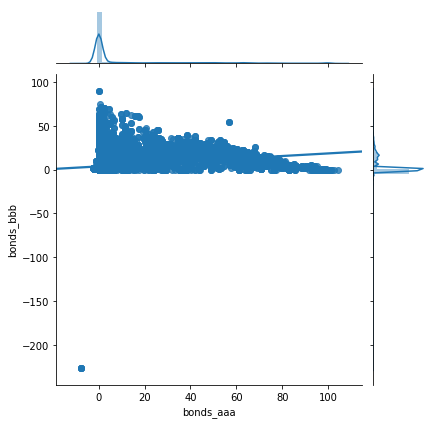

In [33]:
sns.jointplot('bonds_aaa', 'bonds_bbb', data=train_df, kind='reg')

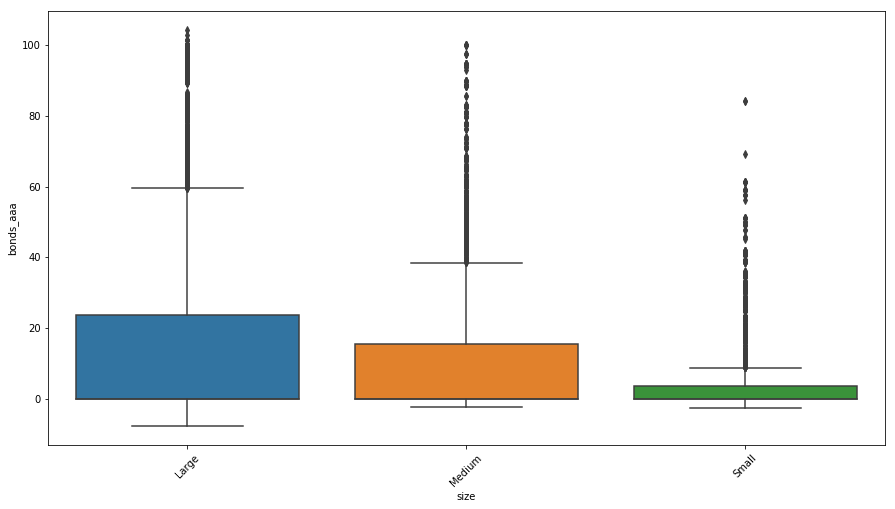

In [34]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('size', 'bonds_aaa', data=train_df)

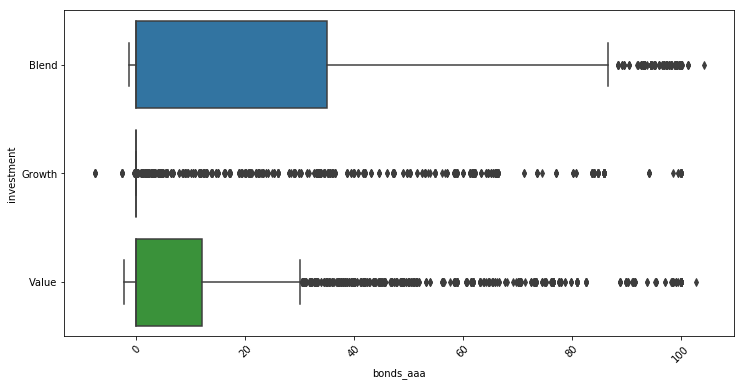

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 45)
sns.boxplot('bonds_aaa', 'investment', data=train_df)

In [36]:
categorical_feature_columns

['size', 'category', 'investment', 'fund_symbol', 'fund_name', 'fund_family']

In [37]:
for cols in categorical_feature_columns:
  print (cols, train_df[cols].value_counts().shape[0])

size 3
category 111
investment 3
fund_symbol 17770
fund_name 17769
fund_family 702


In [0]:
cleanup_sizes = {"size": {"Small": 1, "Medium": 2, "Large": 3}}

In [39]:
train_df.replace(cleanup_sizes, inplace=True)
train_df['size'].head()

0    3
1    3
2    3
3    2
4    3
Name: size, dtype: int64

In [0]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['investment'])], axis = 1)

In [0]:
columns = ['fund_symbol', 'fund_name', 'fund_family', 'category', 'investment']
train_df.drop(columns, inplace=True, axis=1)

In [0]:
X_train, Y_train = train_df.loc[:, train_df.columns != 'bonds_aaa'], train_df.loc[:, 'bonds_aaa']

In [0]:
numerical_feature_columns = list(X_train._get_numeric_data().columns)

In [44]:
stand_scale= StandardScaler()
X_train.loc[:, numerical_feature_columns] = stand_scale.fit_transform(X_train.loc[:, numerical_feature_columns])
standardized_DF = preprocessing.scale(X_train)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
lasso_model = Lasso(alpha=0.01)

In [47]:
from sklearn.feature_selection import RFE
rfe = RFE(lasso_model, 15)
rfe = rfe.fit(standardized_DF, Y_train)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True  True  True  True False False False False
 False False False False False False False False  True False  True False
  True  True False False False False False  True False False False False
  True  True  True  True False False False False]
[ 1 20  1 22  1  1  1  1 12 16  3 28  2 11  7 10 19 25 21 23  1 17  1 29
  1  1 18 27 15  4  5  1 13 14  9  8  1  1  1  1 24  6 30 26]


In [55]:
scores = cross_val_score(lasso_model, standardized_DF[:, rfe.support_], Y_train, cv=5)
scores.mean()

0.32530790805003906

In [56]:
scores

array([0.32920397, 0.3334092 , 0.31717948, 0.3225874 , 0.32415948])

In [0]:
lasso = Lasso(alpha=.01)

# Train the model using the training sets
lasso.fit(standardized_DF[:, rfe.support_], Y_train) 

# Predict the values using the model
Y_lasso_predict = lasso.predict(standardized_DF[:, rfe.support_])

In [62]:
Y_train[100:110]

100     0.00
101     0.00
102     0.00
103     0.00
104     0.00
105     1.51
106     0.00
107    71.79
108    85.81
109     3.04
Name: bonds_aaa, dtype: float64

In [63]:
Y_lasso_predict[100:110]

array([10.32161139,  4.09214701, -3.0142864 ,  9.98770612,  4.66112458,
       32.13599847,  7.11215433, 48.33309591, 19.66849238,  5.88300454])

In [0]:
def root_mean_square_error(y_pred,y_test):
    rmse_train = np.sqrt(np.dot(abs(y_pred-y_test),abs(y_pred-y_test))/len(y_test))
    return rmse_train

In [65]:
root_mean_square_error(Y_lasso_predict, Y_train)

20.172257509577697